<a href="https://colab.research.google.com/github/Keerthi612/Class/blob/main/ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install scikit-learn

In [48]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [49]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

In [50]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1
    return results


x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [51]:
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [52]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.2586 - loss: 3.3074 - val_accuracy: 0.5744 - val_loss: 1.9990
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.5003 - loss: 2.0783 - val_accuracy: 0.6318 - val_loss: 1.6163
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5819 - loss: 1.7466 - val_accuracy: 0.6759 - val_loss: 1.4475
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6397 - loss: 1.5096 - val_accuracy: 0.6892 - val_loss: 1.3490
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6708 - loss: 1.3945 - val_accuracy: 0.6981 - val_loss: 1.2840
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6914 - loss: 1.2857 - val_accuracy: 0.7061 - val_loss: 1.2427
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7120 - loss: 1.2046 - val_accuracy: 0.7208 - val_loss: 1.1957
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7173 - loss: 1.1487 - val_accuracy: 0.7289 - 

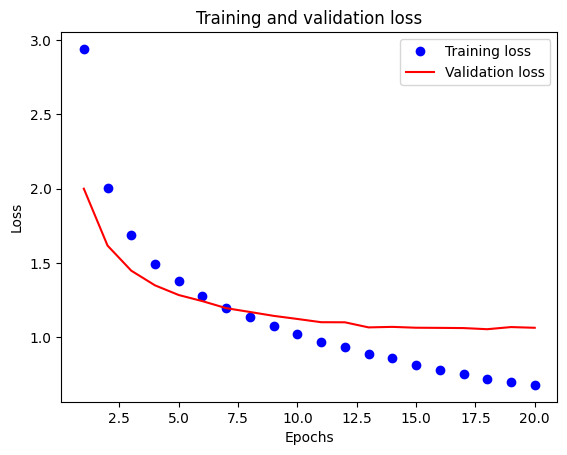

In [55]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

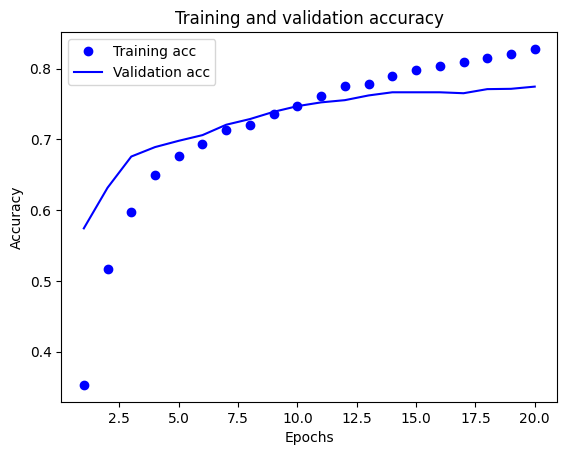

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [58]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 7  1  0 ...  0  0  0]
 [ 0 87  0 ...  0  0  0]
 [ 0  6 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]]


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.58      0.83      0.69       105
           2       0.77      0.50      0.61        20
           3       0.92      0.94      0.93       813
           4       0.82      0.89      0.86       474
           5       0.00      0.00      0.00         5
           6       1.00      0.71      0.83        14
           7       0.00      0.00      0.00         3
           8       0.57      0.68      0.62        38
           9       0.59      0.64      0.62        25
          10       0.71      0.90      0.79        30
          11       0.54      0.80      0.64        83
          12       0.25      0.08      0.12        13
          13       0.58      0.57      0.58        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.62      0.79      0.69        99
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
